In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("luiscorter/netflix-original-films-imdb-scores")

print("Path to dataset files:", path)

import os
file_names = os.listdir(path)
print("Files in dataset directory:", file_names)

Path to dataset files: C:\Users\uniat\.cache\kagglehub\datasets\luiscorter\netflix-original-films-imdb-scores\versions\1
Files in dataset directory: ['NetflixOriginals.csv']


In [3]:
df = pd.read_csv(path+"//NetflixOriginals.csv",encoding = "ISO-8859-1")
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [4]:
def categorize_runtime(minutes):
    if minutes < 60:
        return 'Short'
    elif 60 <= minutes <= 100:
        return 'Medium'
    else:
        return 'Long'

df['Runtime Category'] = df['Runtime'].apply(categorize_runtime)

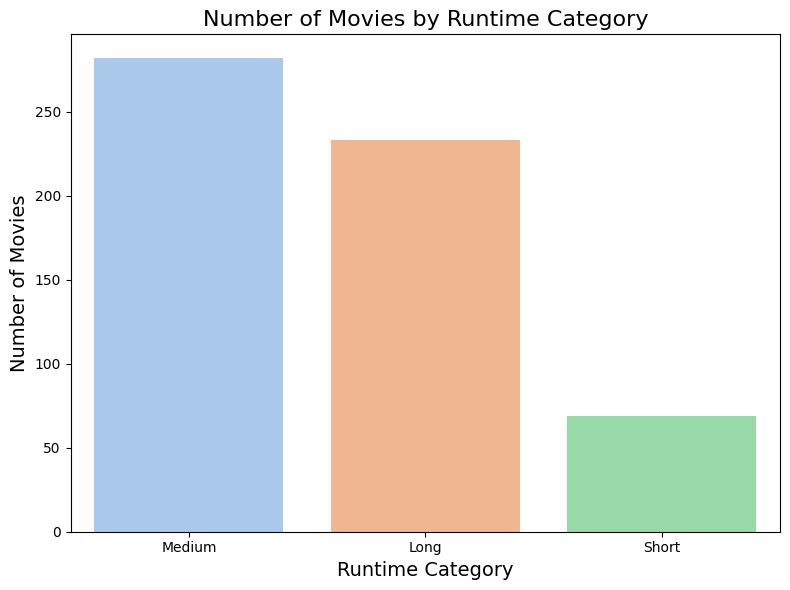

In [5]:
# Count the number of movies in each Runtime Category
runtime_category_counts = df['Runtime Category'].value_counts()

# Plot the Runtime Category counts
plt.figure(figsize=(8, 6))
sns.barplot(x=runtime_category_counts.index, y=runtime_category_counts.values, palette='pastel')
plt.title('Number of Movies by Runtime Category', fontsize=16)
plt.xlabel('Runtime Category', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.tight_layout()
plt.show()

In [6]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [7]:
df.isnull().sum()

Title               0
Genre               0
Premiere            0
Runtime             0
IMDB Score          0
Language            0
Runtime Category    0
dtype: int64

In [8]:
# Convert the 'Premiere' column to datetime, handling inconsistent formats
df['Premiere'] = pd.to_datetime(df['Premiere'], errors='coerce')

# Extract year, month, and weekday columns
df['year'] = df['Premiere'].dt.year.astype('Int64')
df['month'] = df['Premiere'].dt.month_name()
df['weekday'] = df['Premiere'].dt.day_name()

df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Runtime Category,year,month,weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,Short,2019,August,Monday
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,Medium,2020,August,Friday
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,Medium,2019,December,Thursday
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,Medium,2018,January,Friday
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,Medium,2020,October,Friday


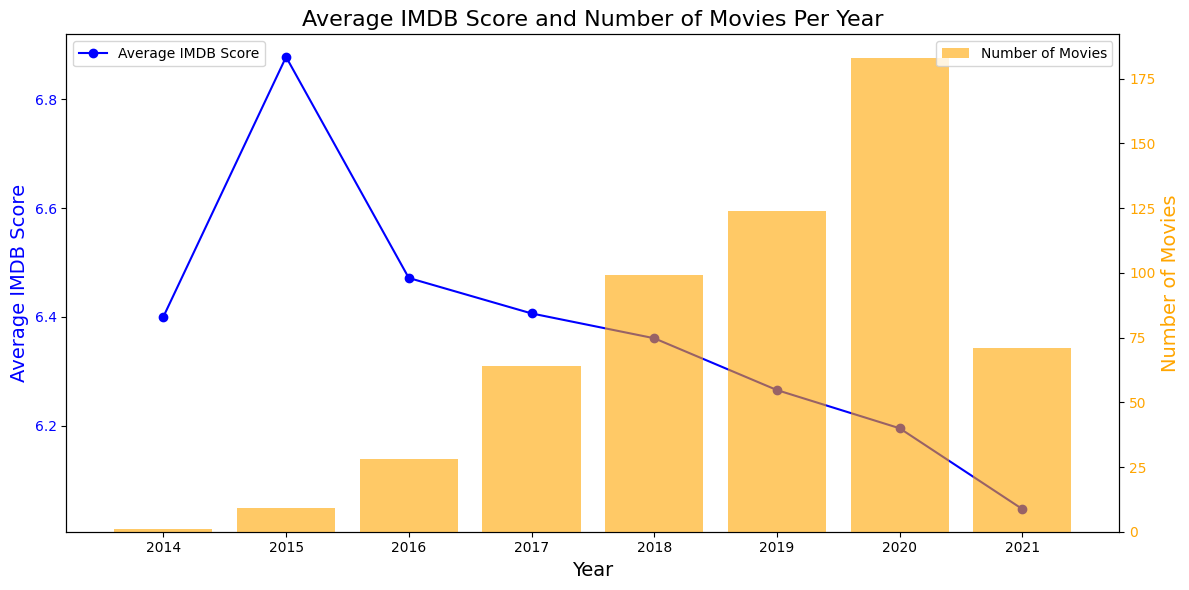

In [10]:
avg_score_per_year = df.groupby('year')['IMDB Score'].mean().reset_index()
movies_per_year = df['year'].value_counts().reset_index()
movies_per_year.columns = ['Year', 'Number of Movies']


# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first dataset (e.g., avg_score_per_year) as a line plot
ax1.plot(avg_score_per_year['year'], avg_score_per_year['IMDB Score'], color='blue', marker='o', label='Average IMDB Score')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Average IMDB Score', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a twin axis to plot another dataset (e.g., movies_per_year)
ax2 = ax1.twinx()
ax2.bar(movies_per_year['Year'], movies_per_year['Number of Movies'], color='orange', alpha=0.6, label='Number of Movies')
ax2.set_ylabel('Number of Movies', color='orange', fontsize=14)
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

# Add a title
plt.title('Average IMDB Score and Number of Movies Per Year', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

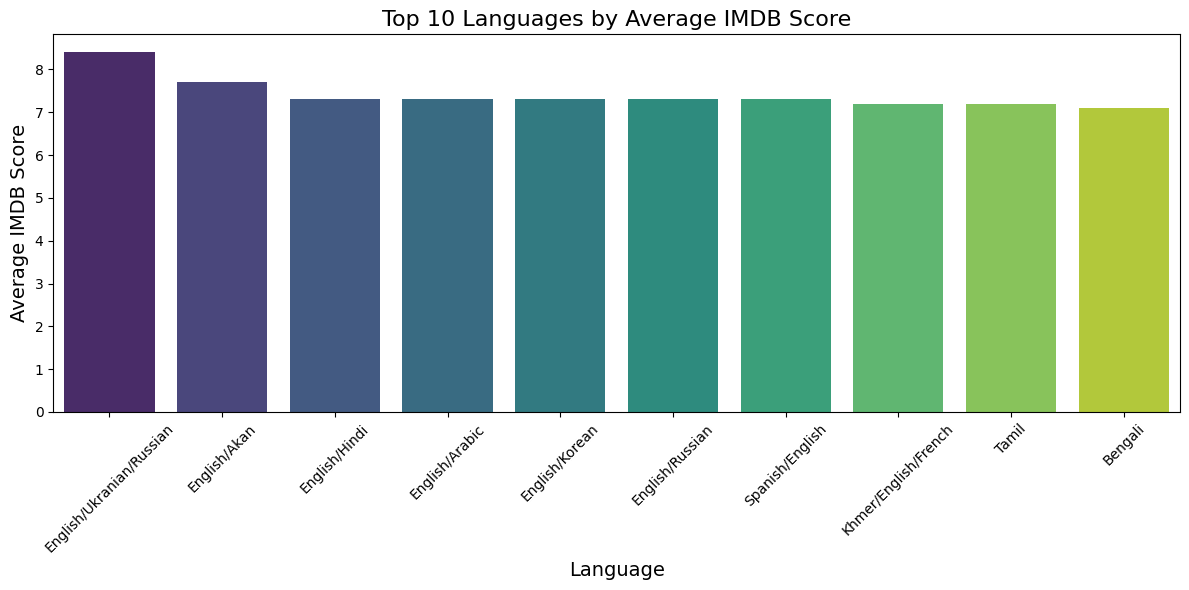

In [13]:
language_avg_score = df.groupby('Language')['IMDB Score'].mean().reset_index()
language_avg_score = language_avg_score.sort_values(by='IMDB Score', ascending=False)

# Filter the top 10 languages by average IMDB score
top_10_languages = language_avg_score.head(10)

# Plot the top 10 languages
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_languages['Language'], y=top_10_languages['IMDB Score'], palette='viridis')
plt.title('Top 10 Languages by Average IMDB Score', fontsize=16)
plt.xlabel('Language', fontsize=14)
plt.ylabel('Average IMDB Score', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

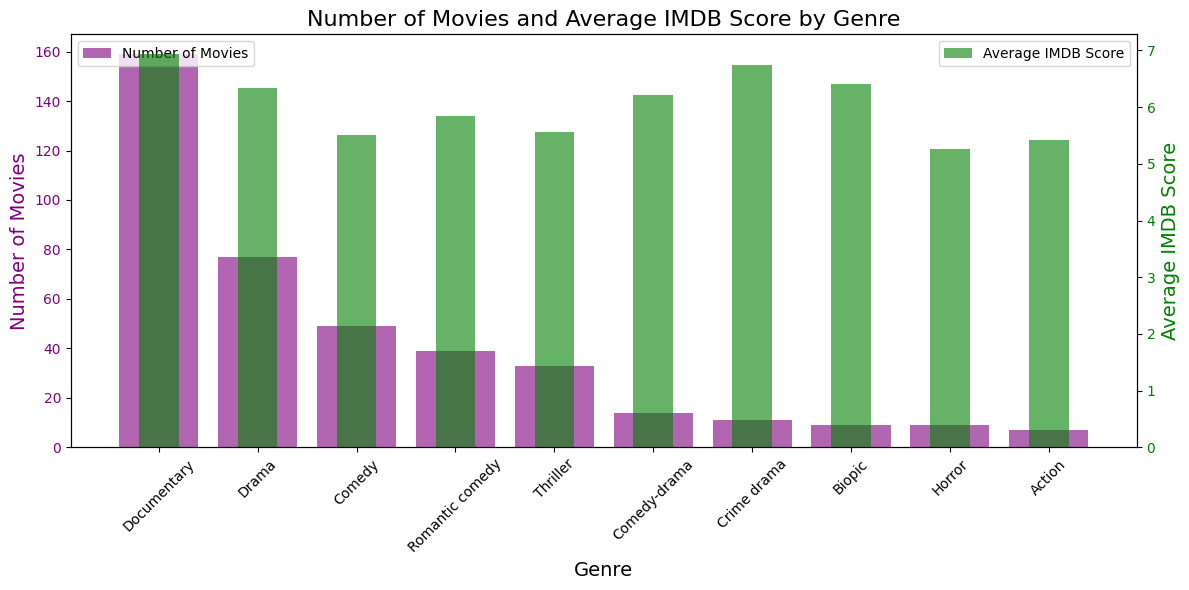

In [ ]:
genre_data= df.groupby('Genre').agg({'Title': 'count', 'IMDB Score': 'mean'}).reset_index()
genre_data.columns = ['Genre', 'Number of Movies', 'IMDB Score']

genre_data = genre_data.sort_values(by='Number of Movies', ascending=False)
genre_data = genre_data.head(10)

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first bar graph (e.g., Number of Movies by Genre)
ax1.bar(genre_data['Genre'], genre_data['Number of Movies'], color='purple', alpha=0.6, label='Number of Movies')
ax1.set_xlabel('Genre', fontsize=14)
ax1.set_ylabel('Number of Movies', color='purple', fontsize=14)
ax1.tick_params(axis='y', labelcolor='purple')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

# Create a twin axis to plot the second bar graph (e.g., Average IMDB Score by Genre)
ax2 = ax1.twinx()
ax2.bar(genre_data['Genre'], genre_data['IMDB Score'], color='green', alpha=0.6, label='Average IMDB Score', width=0.4)
ax2.set_ylabel('Average IMDB Score', color='green', fontsize=14)
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Add a title
plt.title('Number of Movies and Average IMDB Score by Genre', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


###  Top 10 Movies With IMDB Ratings

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

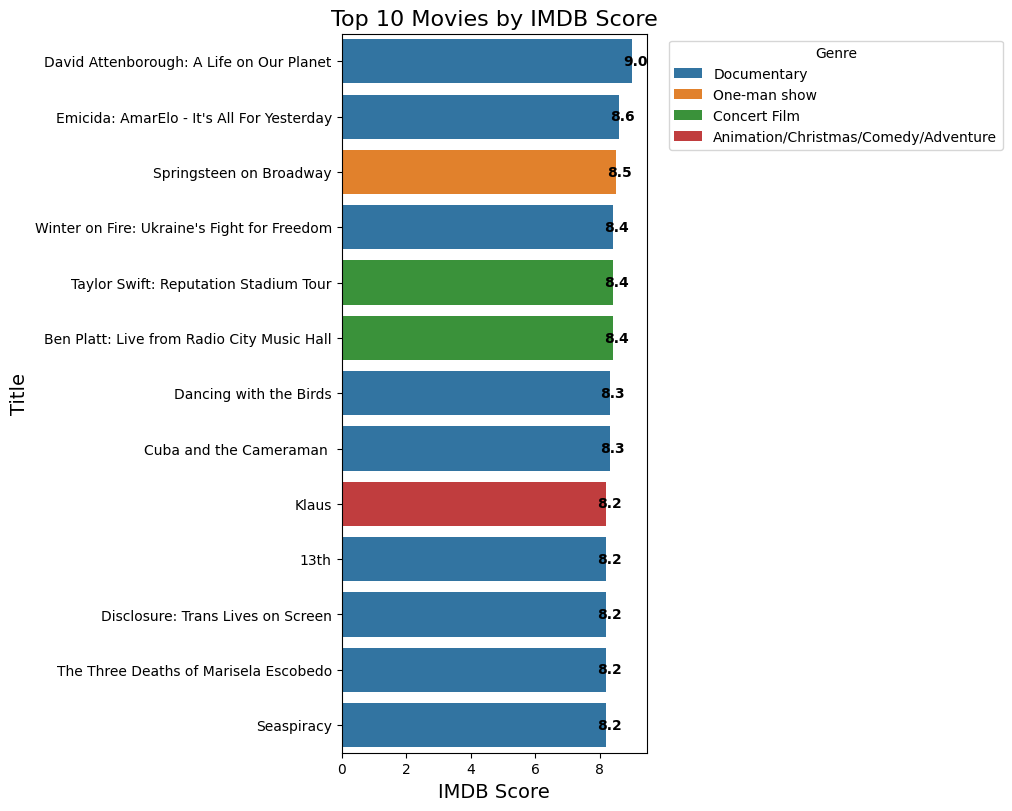

In [17]:
df_temp = df.sort_values(by='IMDB Score', ascending=False).reset_index().iloc[:13, :]

fig, ax = plt.subplots(1, 1, figsize=(10, 8), constrained_layout=True)
ax = sns.barplot(y='Title', x='IMDB Score', data=df_temp, hue='Genre', dodge=False)

for i in ax.patches:
    ax.text(x=i.get_width() + 0.1, y=i.get_y() + i.get_height() / 2,
            s=f"{i.get_width():.1f}",
            ha='center', va='center', size=10, weight='bold', color='black')

ax.set_ylabel('Title', fontsize=14)
ax.set_xlabel('IMDB Score', fontsize=14)
plt.title('Top 10 Movies by IMDB Score', fontsize=16)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Correlation between IMDB score and 'Runtime'

In [18]:
df[['IMDB Score','Runtime']].corr()

,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


In [19]:
fig = px.scatter(df, x='IMDB Score', y='Runtime')
fig.show()